In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [75]:
def asympRead(cutoff): 
    return pd.concat([pd.read_csv("asymp-{0:d}.dat".format(cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)

In [95]:
data = asympRead([14,16,18,20,22])
peaks = pd.read_csv("minE.dat", header=None, names=["cutscale", "E"], index_col=0)    

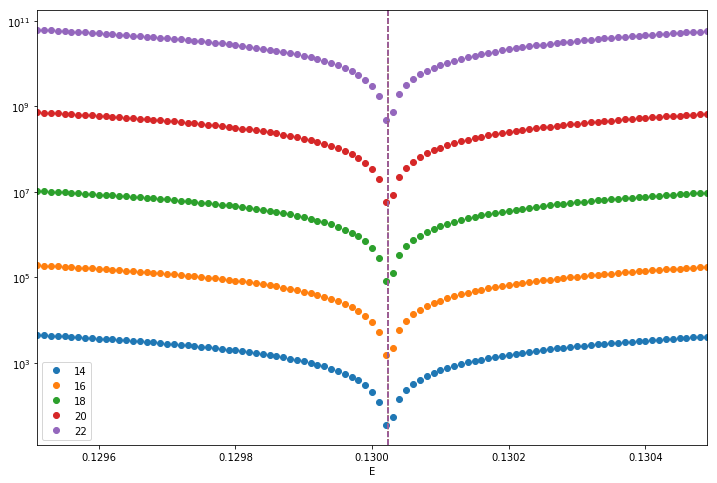

In [98]:
plotData = data.loc[(data.index > 0.1295) & (data.index < 0.1305)].plot(marker="o", ls="", logy=True)
for line in plt.gca().get_lines():
    color = line._get_markerfacecolor()
    pos = line.get_label()
    plotData.axvline(peaks.loc[int(pos)][0], ls="--", color=color)

In [99]:
peaks

,E
cutscale,
14,0.130024
16,0.130024
18,0.130024
20,0.130024
22,0.130024
